# Problem Statement

# Consider only the below columns and prepare a prediction model for predicting Price.
Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

Model -- model of the car

Price -- Offer Price in EUROs

Age_08_04 -- Age in months as in August 2004

KM -- Accumulated Kilometers on odometer

HP -- Horse Power

cc -- Cylinder Volume in cubic centimeters

Doors -- Number of doors

Gears -- Number of gear positions

Quarterly_Tax -- Quarterly road tax in EUROs

Weight -- Weight in Kilograms

In [41]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data
data=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
data.head()

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  

[5 rows x 38 columns]

In [3]:
data=data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
data

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

# Descriptive Analysis

In [4]:
data.describe()

Price    Age_08_04             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    52.64112  
min       2.000000     3.000000      19.000000  1000.00000  
25%       3.000000     5.000000      69.000000  1040.00000  
50%       4.000000     5.000000      85.000000  1070.00000  
75%       5.000000     5.000000      85.000000  1085.00000  
max       5.000000     6.000000     283.000000  1615.00000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


- all the data types are correct

In [5]:
#Renaming the columns name
df=data.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1,inplace=True)

In [46]:
data

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1431   7500   69  20544   86  1300      3      5   69    1025
1432  10845   72  19000   86  1300      3      5   69    1015
1433   8500   71  17016   86  1300      3      5   69    1015
1434   7250   70  16916   86  1300      3      5   69    1015
1435   6950   76      1  110  1600      5      5   19    1114

[1436 rows x 9 columns]

In [9]:
#Checking for missing values
data[data.values==0.0]

Empty DataFrame
Columns: [Price, Age, KM, HP, CC, Doors, Gears, QT, Weight]
Index: []

- there are no '0' values in the dataset.

In [11]:
data.isnull().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

<AxesSubplot:>

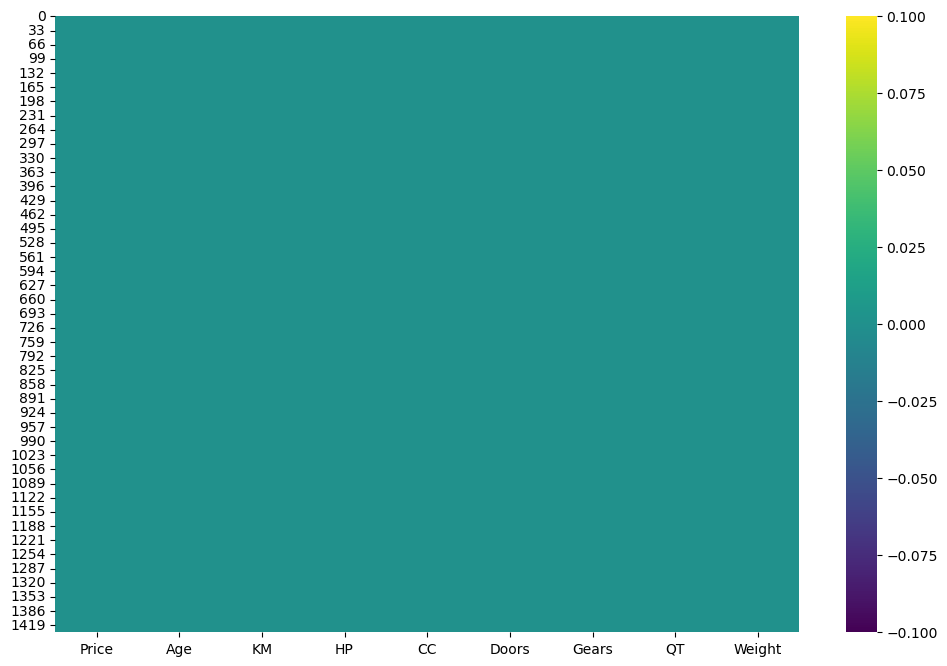

In [12]:
#Visualizing Missing Values
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull(),cmap='viridis')

In [13]:
#Checking for Duplicated Values
data[data.duplicated()].shape

(1, 9)

In [14]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [15]:
data[data.duplicated()]

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
113  24950    8  13253  116  2000      5      5  234    1320

In [16]:
data=data.drop_duplicates().reset_index(drop=True)
data[data.duplicated()]

Empty DataFrame
Columns: [Price, Age, KM, HP, CC, Doors, Gears, QT, Weight]
Index: []

- There are duplicated values in the dataset Hence, we dropped those values

# Correlation Coefficient

In [17]:
# scatter matrix, correlation matrix
# pairplot,pd.plotting.scatter_matrix.

In [18]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300

In [19]:
data.corr()

Price       Age        KM        HP        CC     Doors     Gears  \
Price   1.000000 -0.876273 -0.569420  0.314134  0.124375  0.183604  0.063831   
Age    -0.876273  1.000000  0.504575 -0.155293 -0.096549 -0.146929 -0.005629   
KM     -0.569420  0.504575  1.000000 -0.332904  0.103822 -0.035193  0.014890   
HP      0.314134 -0.155293 -0.332904  1.000000  0.035207  0.091803  0.209642   
CC      0.124375 -0.096549  0.103822  0.035207  1.000000  0.079254  0.014732   
Doors   0.183604 -0.146929 -0.035193  0.091803  0.079254  1.000000 -0.160101   
Gears   0.063831 -0.005629  0.014890  0.209642  0.014732 -0.160101  1.000000   
QT      0.211508 -0.193319  0.283312 -0.302287  0.305982  0.107353 -0.005125   
Weight  0.575869 -0.466484 -0.023969  0.087143  0.335077  0.301734  0.021238   

              QT    Weight  
Price   0.211508  0.575869  
Age    -0.193319 -0.466484  
KM      0.283312 -0.023969  
HP     -0.302287  0.087143  
CC      0.305982  0.335077  
Doors   0.107353  0.301734  
Gears  -0.005125  0.021238  
QT      1.000000  0.621988  
Weight  0.621988  1.000000

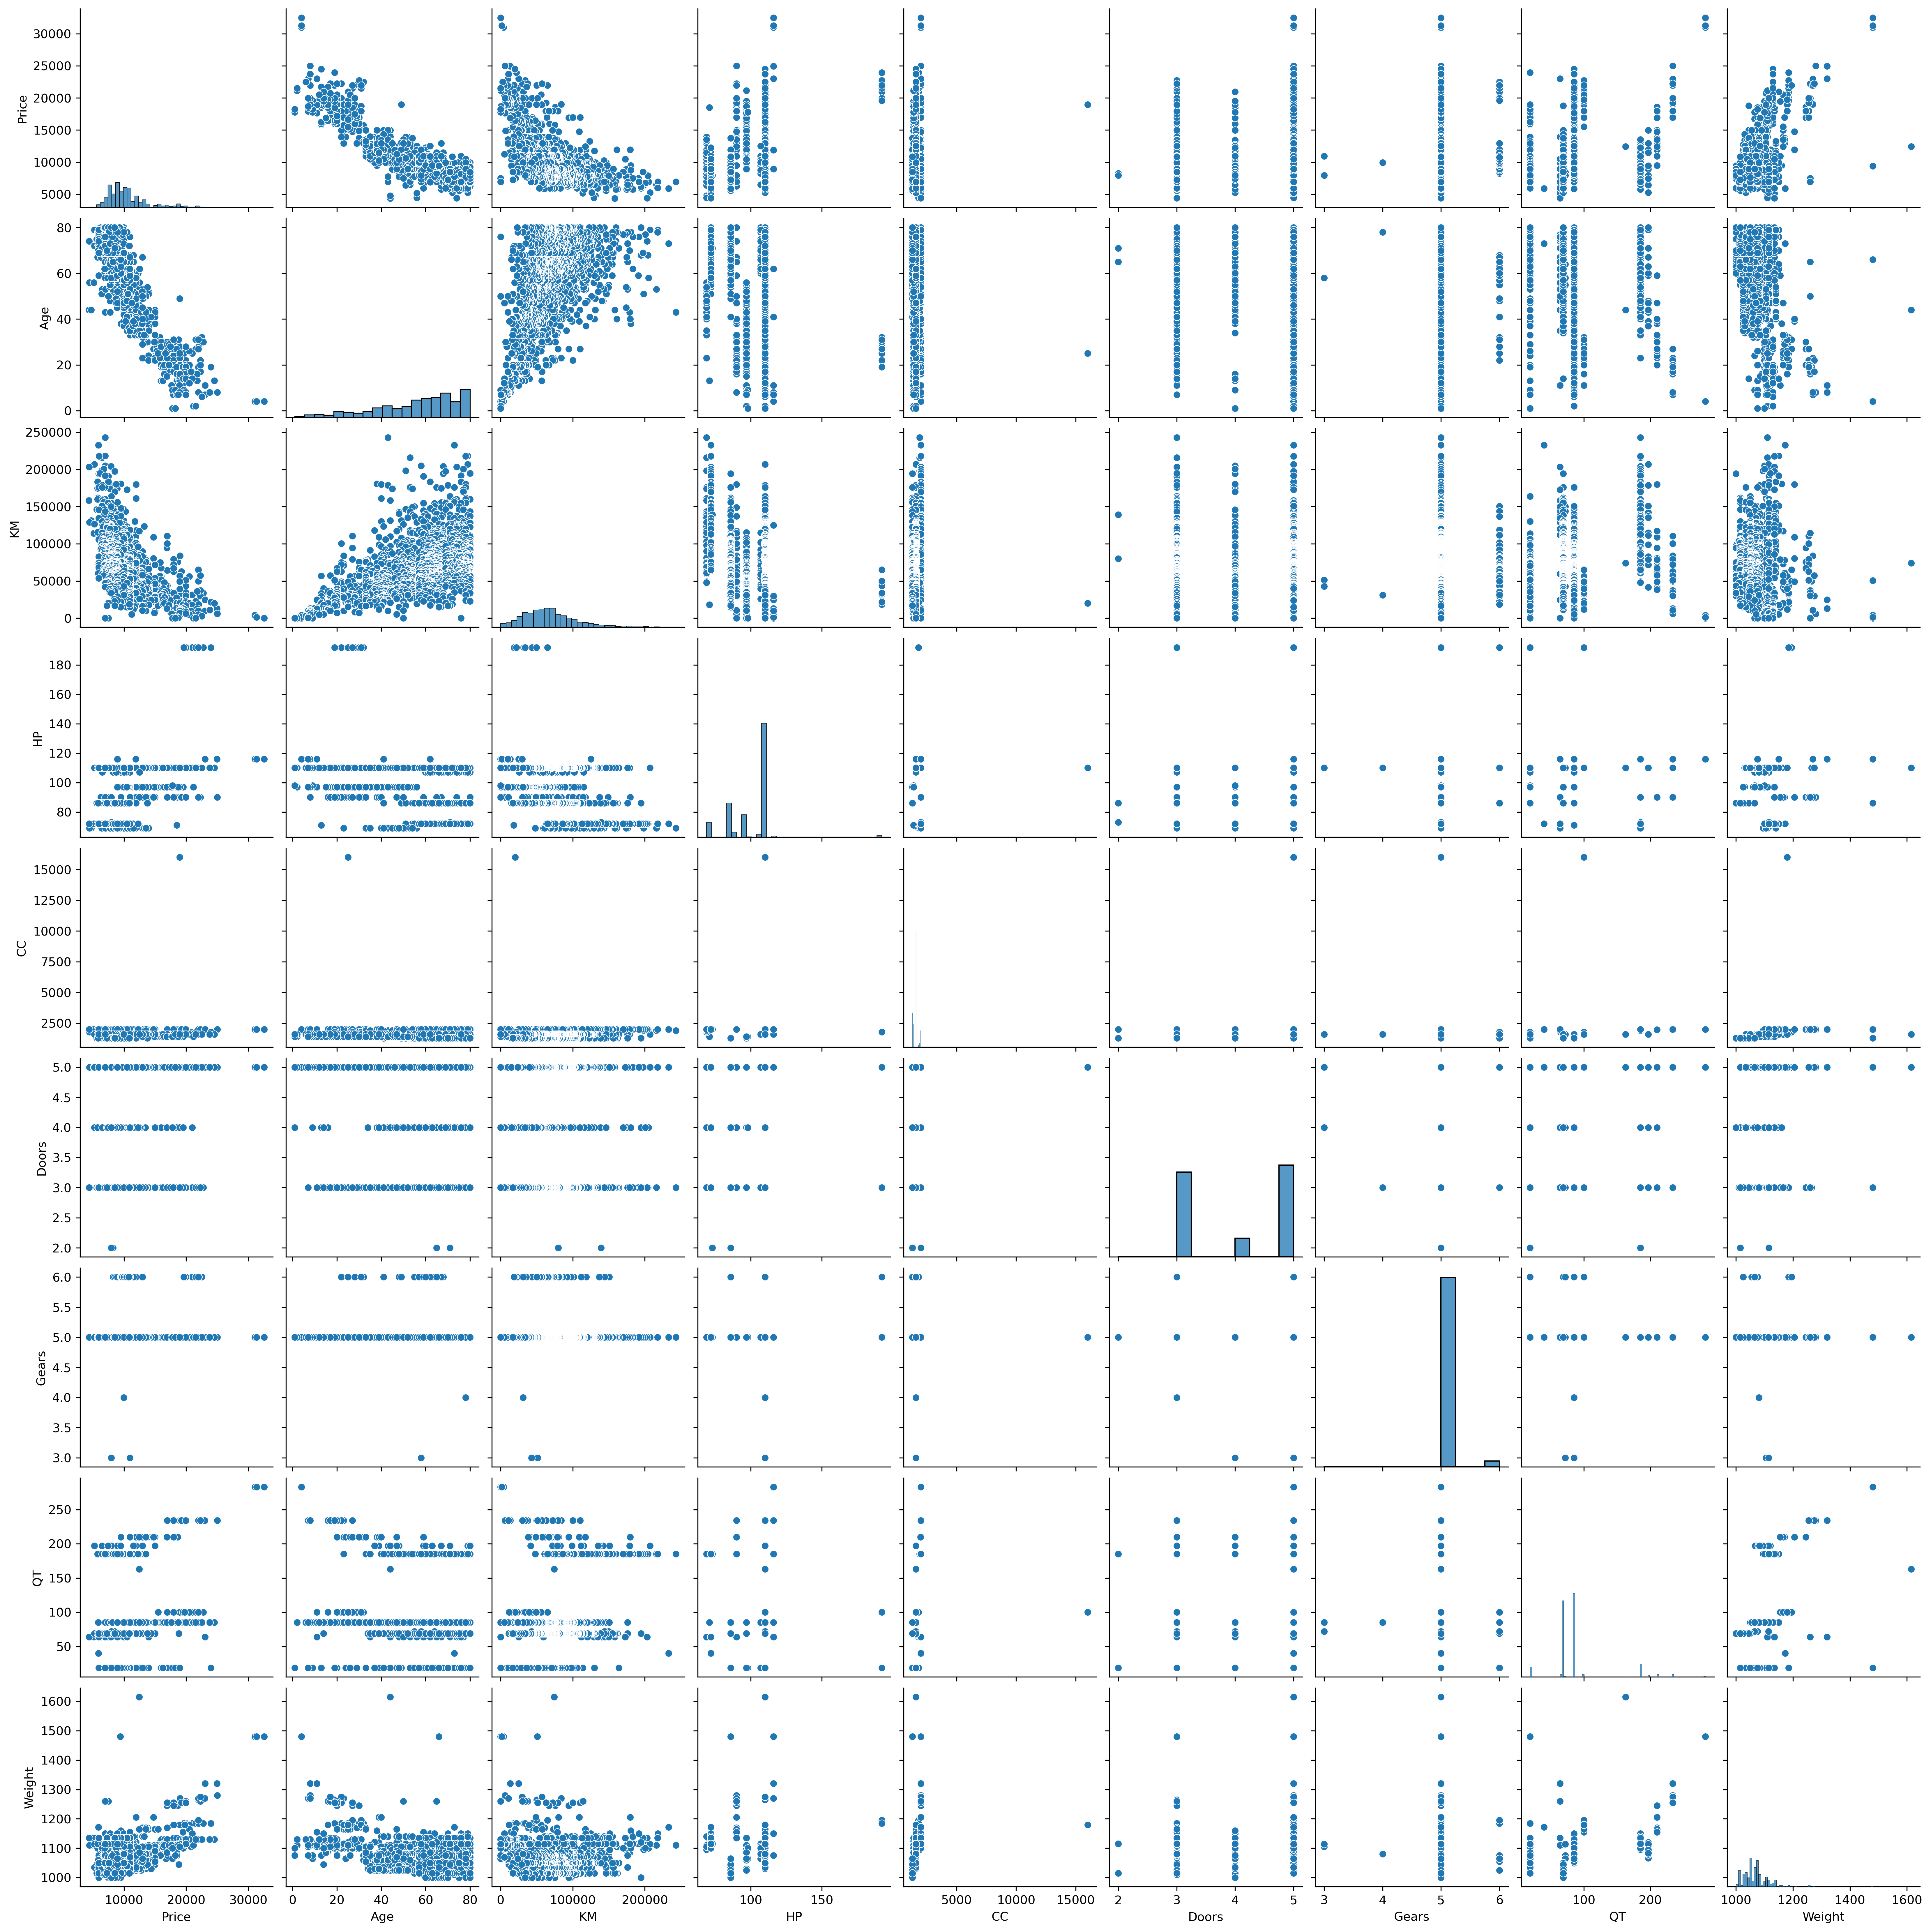

In [20]:
sns.pairplot(data)

<AxesSubplot:>

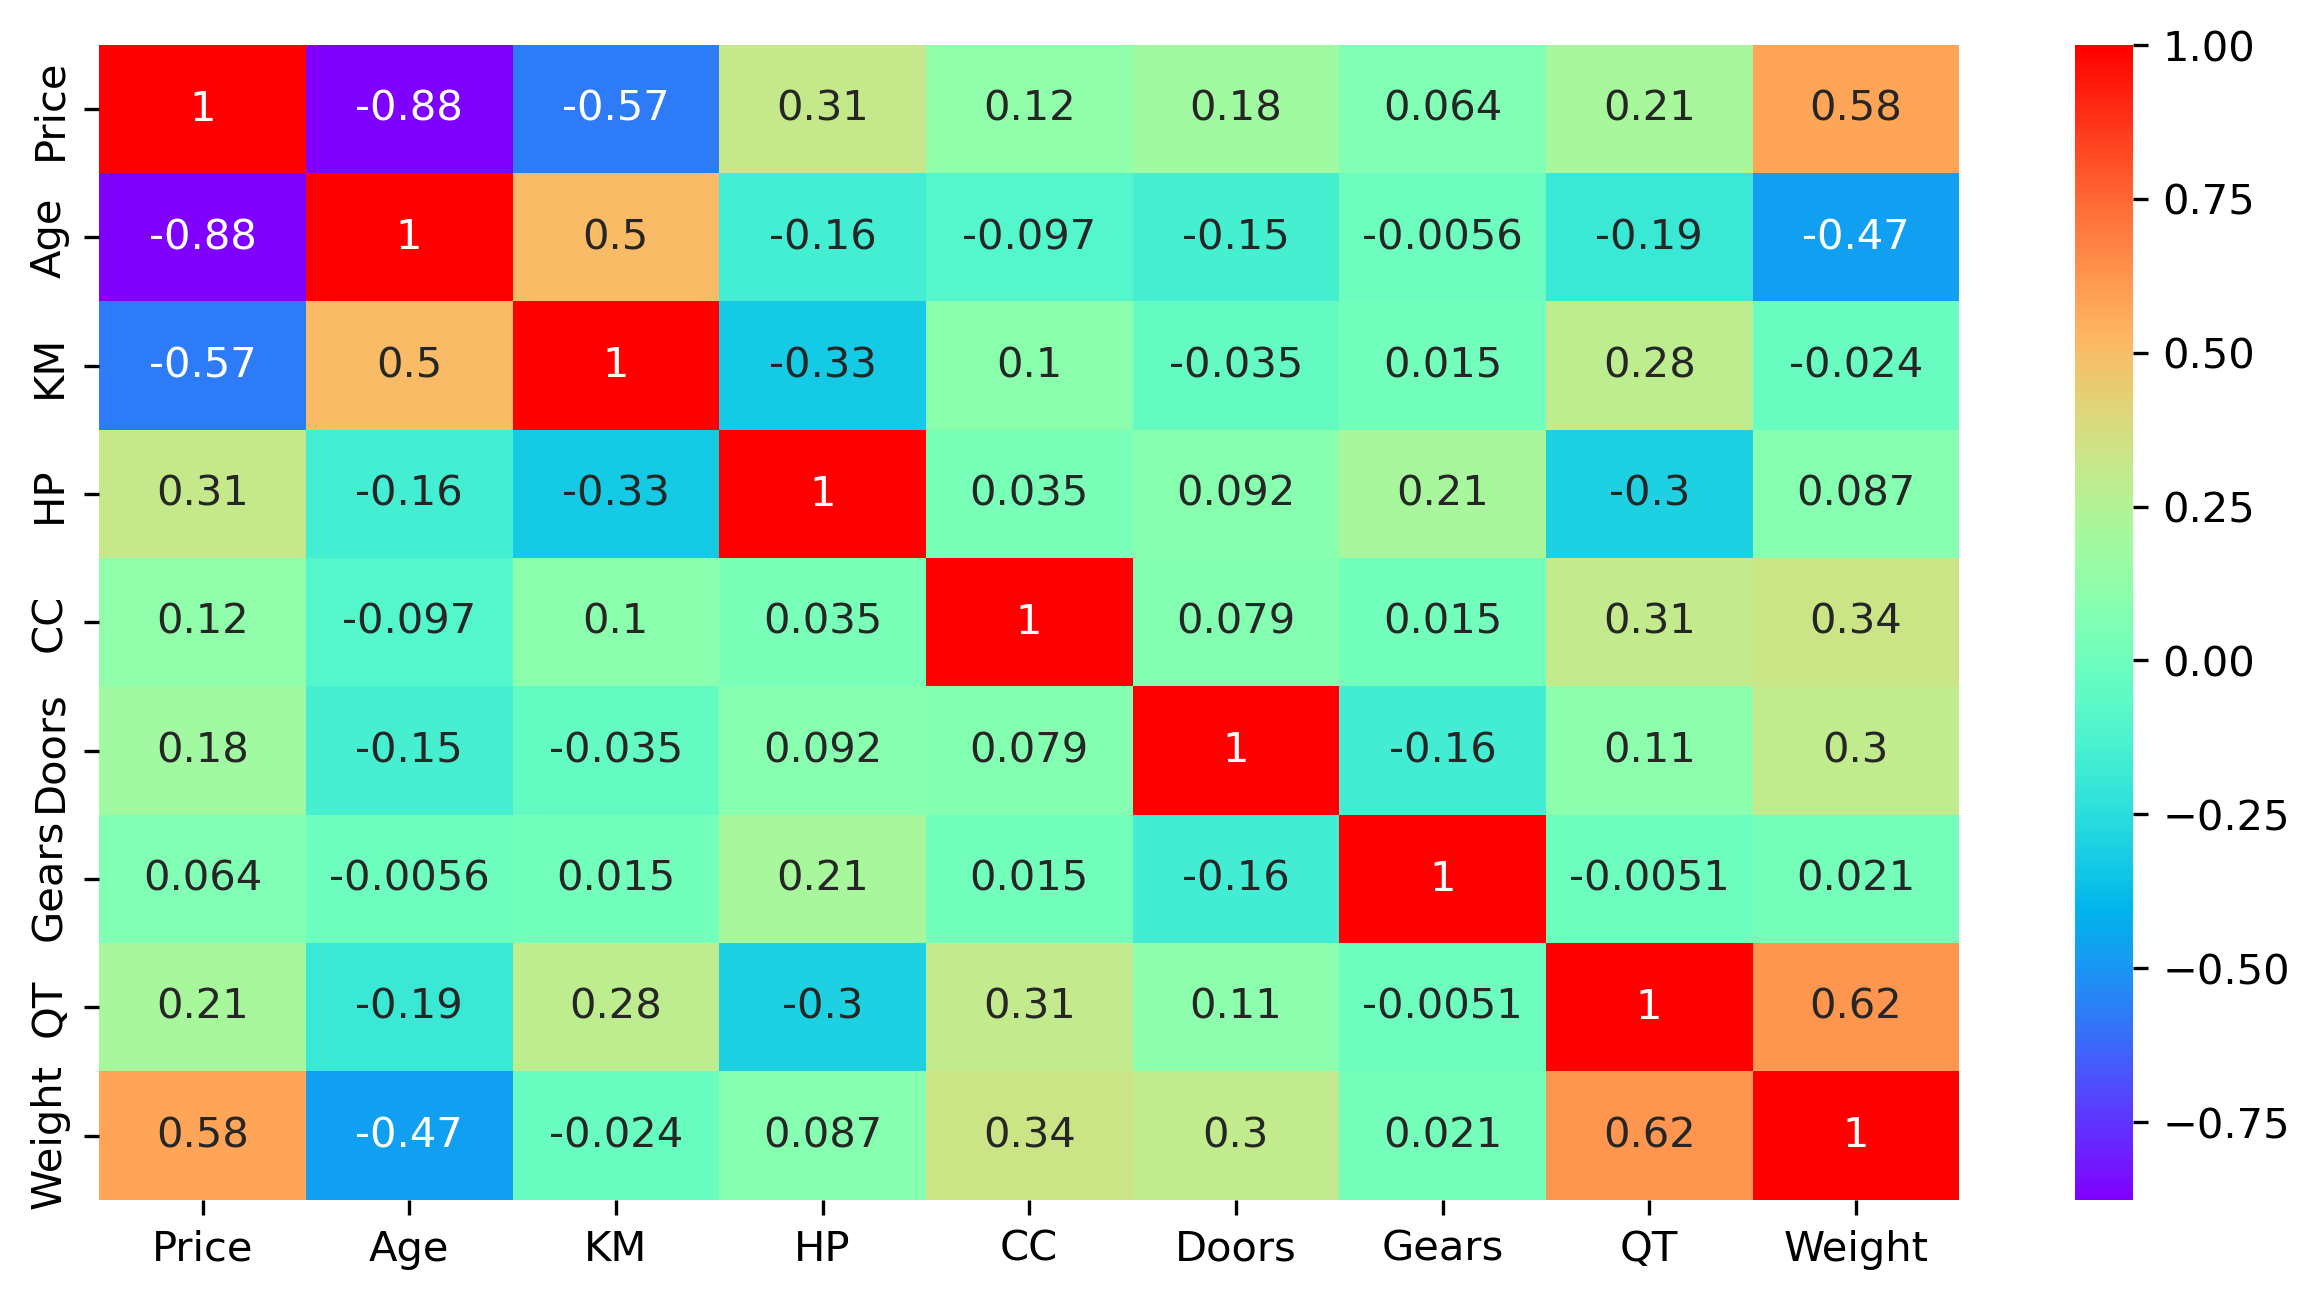

In [21]:
sns.heatmap(data.corr(), annot=True, cmap='rainbow')

# Model Building

In [63]:
import statsmodels.formula.api as smf

In [65]:
model=smf.ols('Price~Age+KM+HP+Doors+Gears+Weight',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1498.
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:09:56   Log-Likelihood:                -12381.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1429   BIC:                         2.481e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6984.3736   1312.036     -5.323      0.000   -9558.097   -4410.650
Age         -122.2422      2.616    -46.729      0.000    -127.374    -117.111
KM            -0.0200      0.001    -16.543      0.000      -0.022      -0.018
HP            28.3501      2.615     10.842      0.000      23.221      33.479
Doors         -9.6802     39.992     -0.242      0.809     -88.129      68.769
Gears        622.2829    197.410      3.152      0.002     235.038    1009.528
Weight        18.6097      0.829     22.447      0.000      16.983      20.236
==============================================================================
Omnibus:                      199.596   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1569.510
Skew:                          -0.381   Prob(JB):                         0.00
Kurtosis:                       8.065   Cond. No.                     2.90e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
# Finding rsquared values
model.rsquared , model.rsquared_adj  # model accuracy is 86.10 %

(0.8628024511073656, 0.8622263942190831)

In [67]:
# Build SLR and MLR models for insignificant variable 'Doors'
# Also find their tvalues and pvalues

In [69]:
slr=smf.ols('Price~Doors',data=data).fit()
slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           1.46e-12
Time:                        11:12:04   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# Doors variable has significant pvalue hence has to be considered in regression equation

In [11]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [12]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.7719638138218404
R2_score (train):  0.8640307618150082
R2_score (test):  0.8614722799605137
RMSE:  1402.0810748973884


In [15]:
regressor_linear.rank_

8

In [16]:
regressor_linear.coef_

array([[-1.21320641e+02, -2.01353093e-02,  2.95093022e+01,
        -7.75554068e-02,  2.06641923e+01,  5.83104153e+02,
         1.83035074e+00,  1.78505581e+01]])

In [17]:
regressor_linear.intercept_

array([-6263.01172068])

In [18]:
#Price prediction
car_new=pd.DataFrame({"Age_08_04":32,"KM":38500, "HP":78,"cc":1500,"Doors":3,"Gears":5,"Quarterly_Tax":200,"Weight":1200 },index=[1]) 
regressor_linear.predict(car_new)
print("The price will be:",regressor_linear.predict(car_new))

The price will be: [[16029.16408435]]


# Calculating VIF

In [71]:
rsq_age = smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=data).fit().rsquared  
vif_age = 1/(1-rsq_age) 

rsq_km = smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=data).fit().rsquared  
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=data).fit().rsquared  
vif_hp = 1/(1-rsq_hp)

rsq_doors = smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=data).fit().rsquared  
vif_doors = 1/(1-rsq_doors) 

rsq_gears = smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=data).fit().rsquared  
vif_gears = 1/(1-rsq_gears) 

rsq_weight = smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=data).fit().rsquared  
vif_weight = 1/(1-rsq_weight) 

# Storing vif values in a data frame
d1 = {'Features':['Age','KM','HP','Doors','Gears','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_doors,vif_gears,vif_weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

Features       VIF
0      Age  1.884620
1       KM  1.756905
2       HP  1.419422
3    Doors  1.156575
4    Gears  1.098723
5   Weight  2.516420

In [23]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

# Model Validation Techniques


# 1) Residual Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

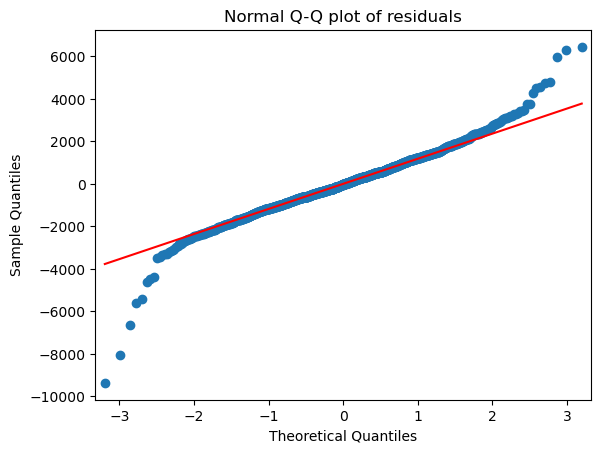

In [24]:

# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show

In [25]:
list(np.where(model.resid>6000))  # outliar detection from above QQ plot of residuals

[array([147, 523], dtype=int64)]

In [26]:
list(np.where(model.resid<-6000))

[array([221, 601, 960], dtype=int64)]

# 2. Residual plot of Homoscedasticity

In [72]:
#Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

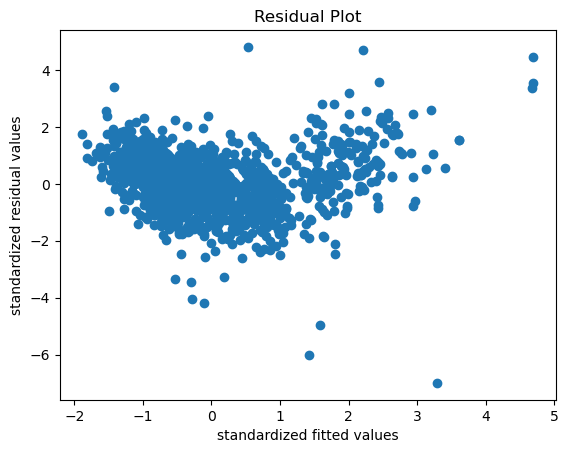

In [28]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

# 3.Residual VS Regressor

In [29]:
# 3)Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

eval_env: 1


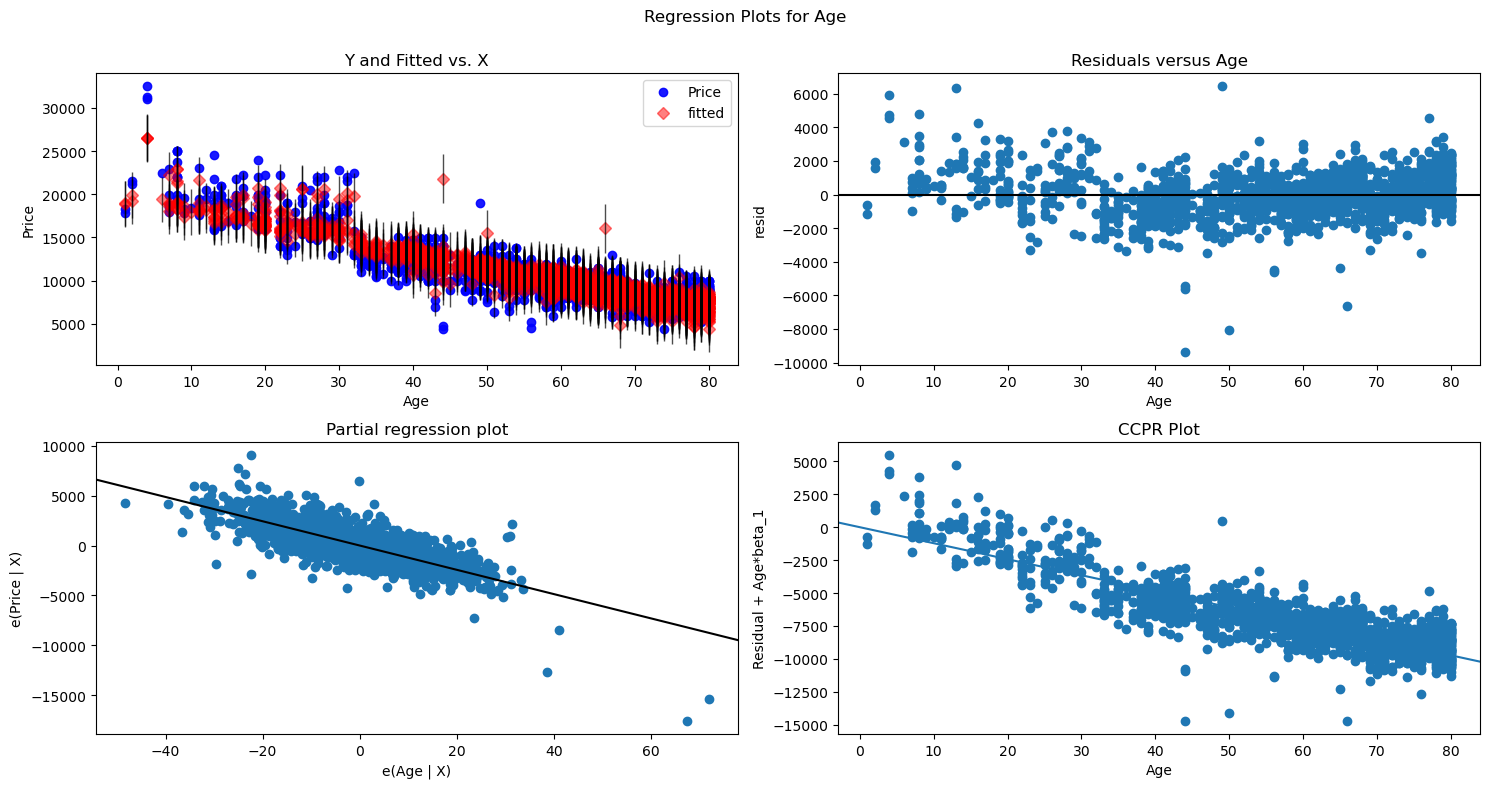

In [30]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

eval_env: 1


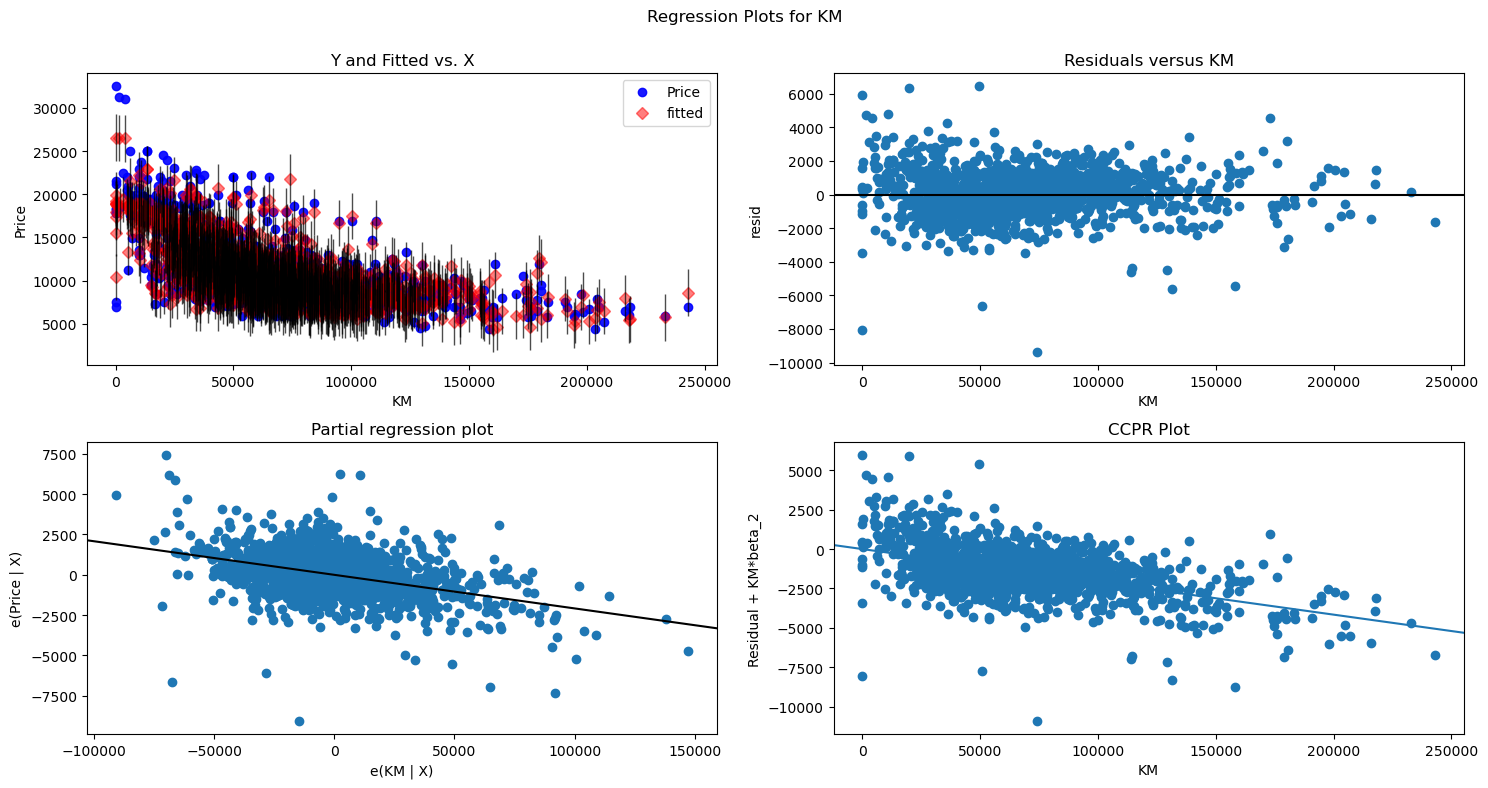

In [31]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


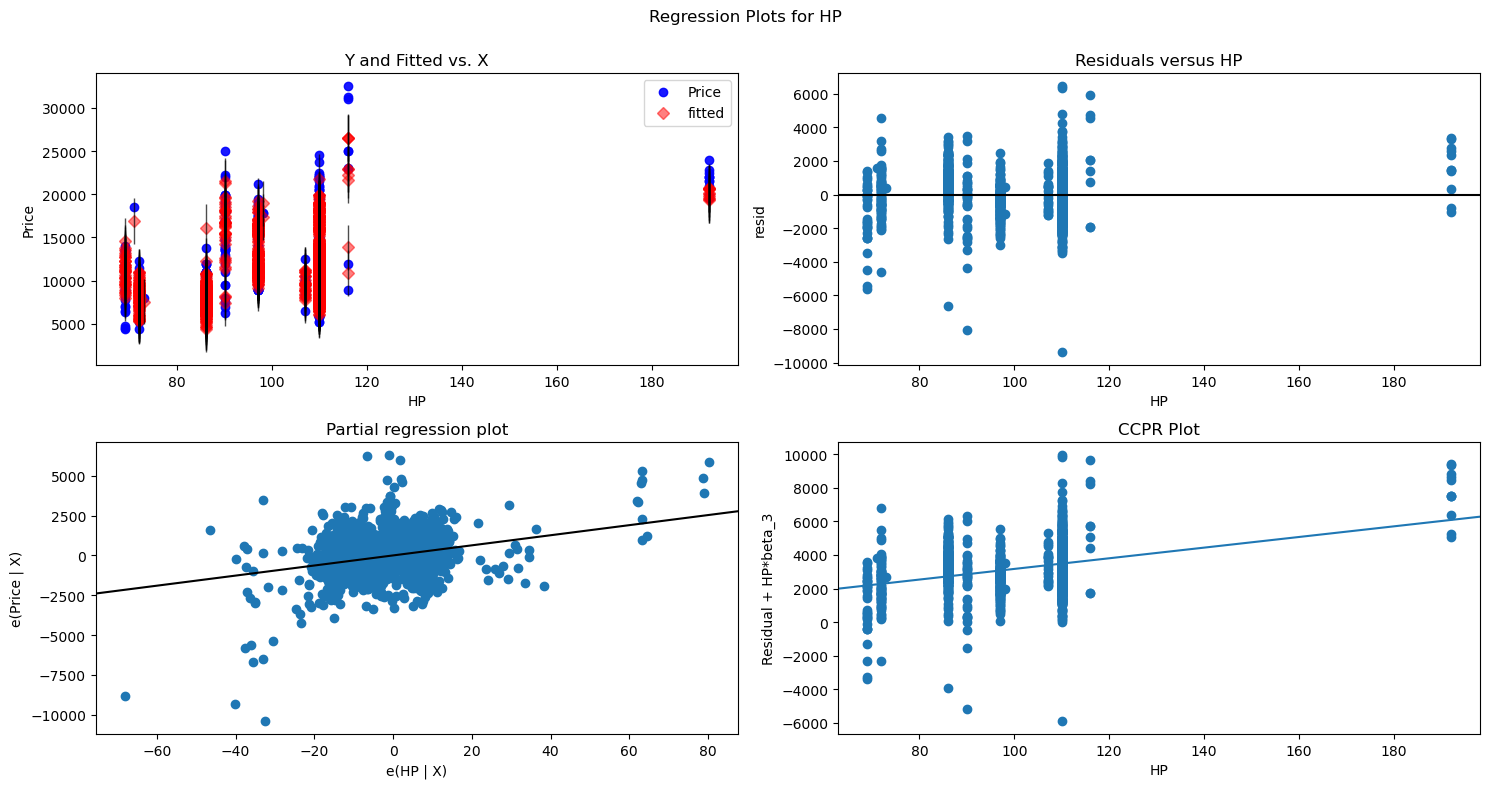

In [32]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


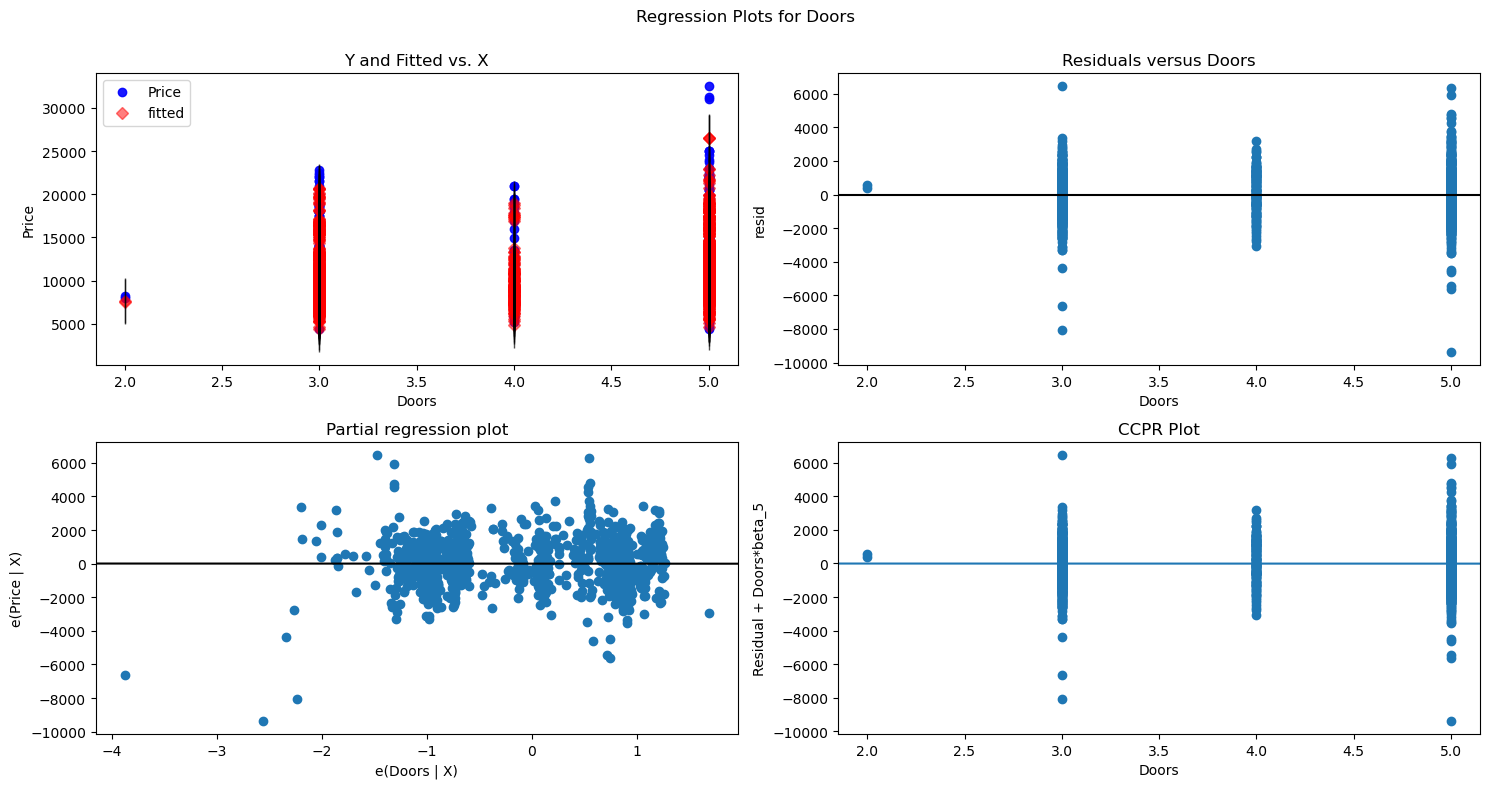

In [33]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


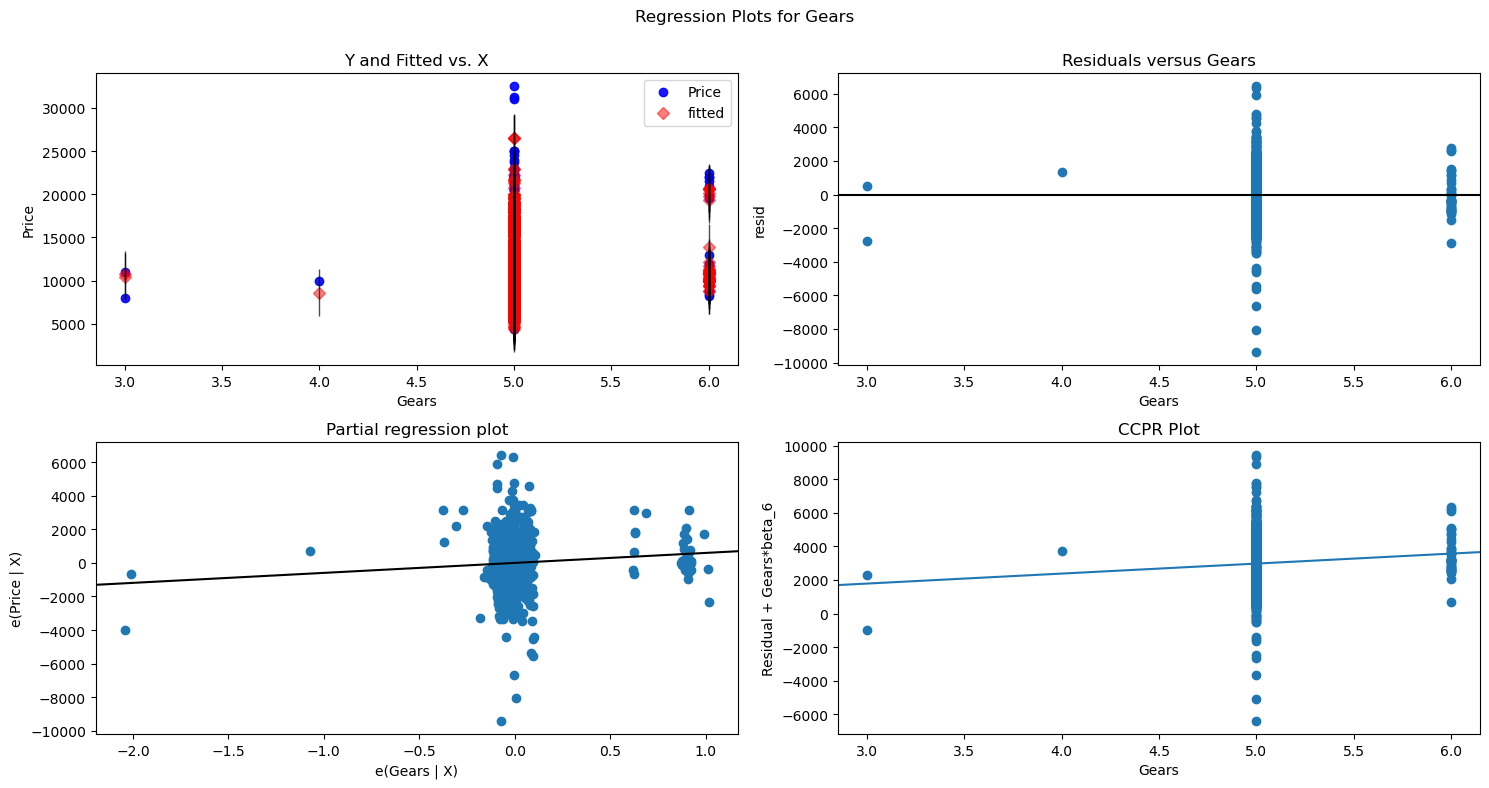

In [34]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


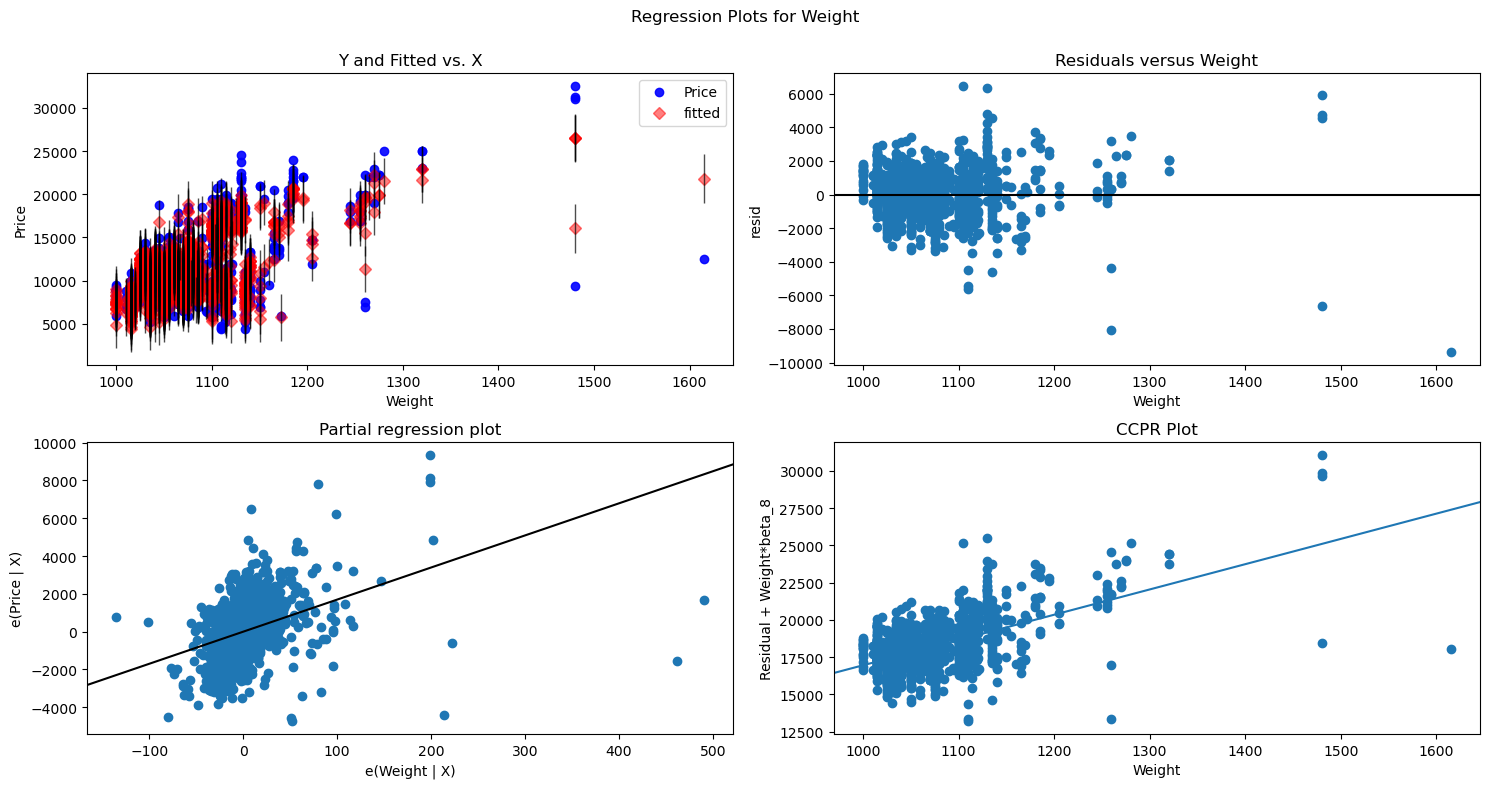

In [35]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)
Two Techniques : 1. Cook's Distance & 2. Leverage value

In [36]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

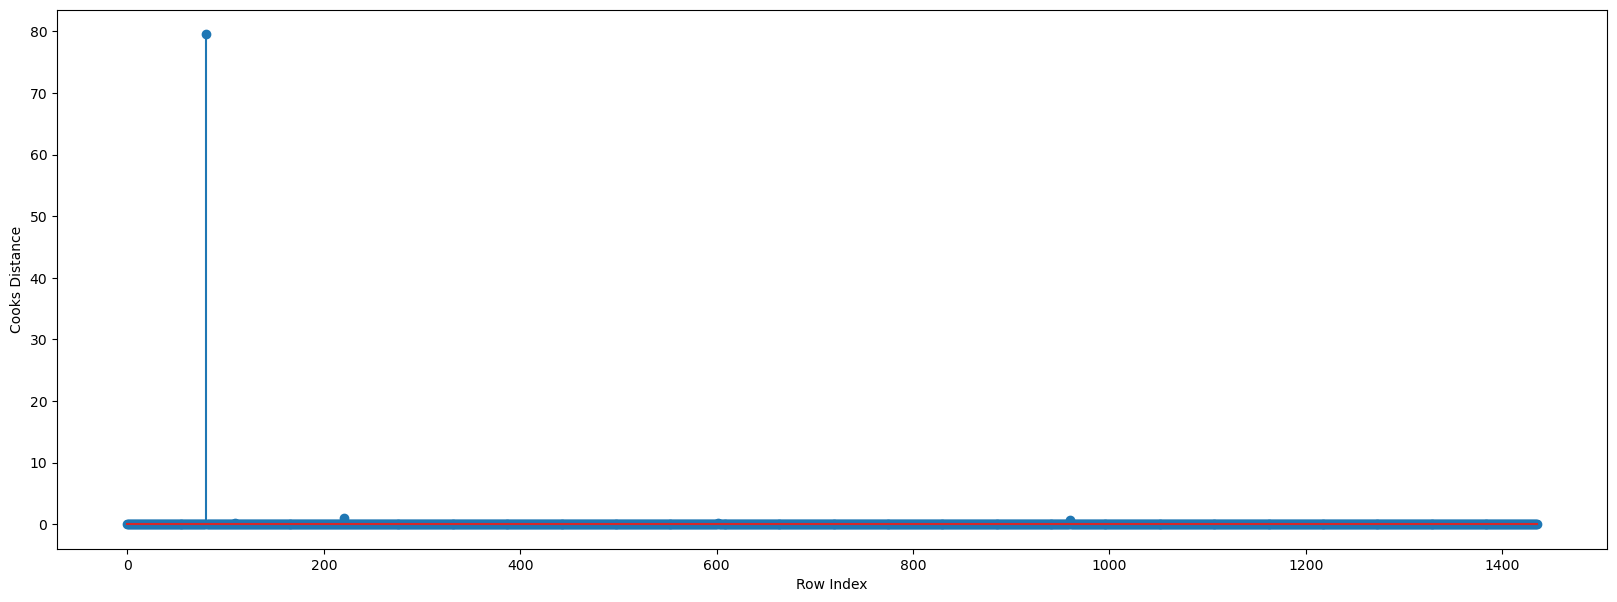

In [38]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [39]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 79.52010624138055)

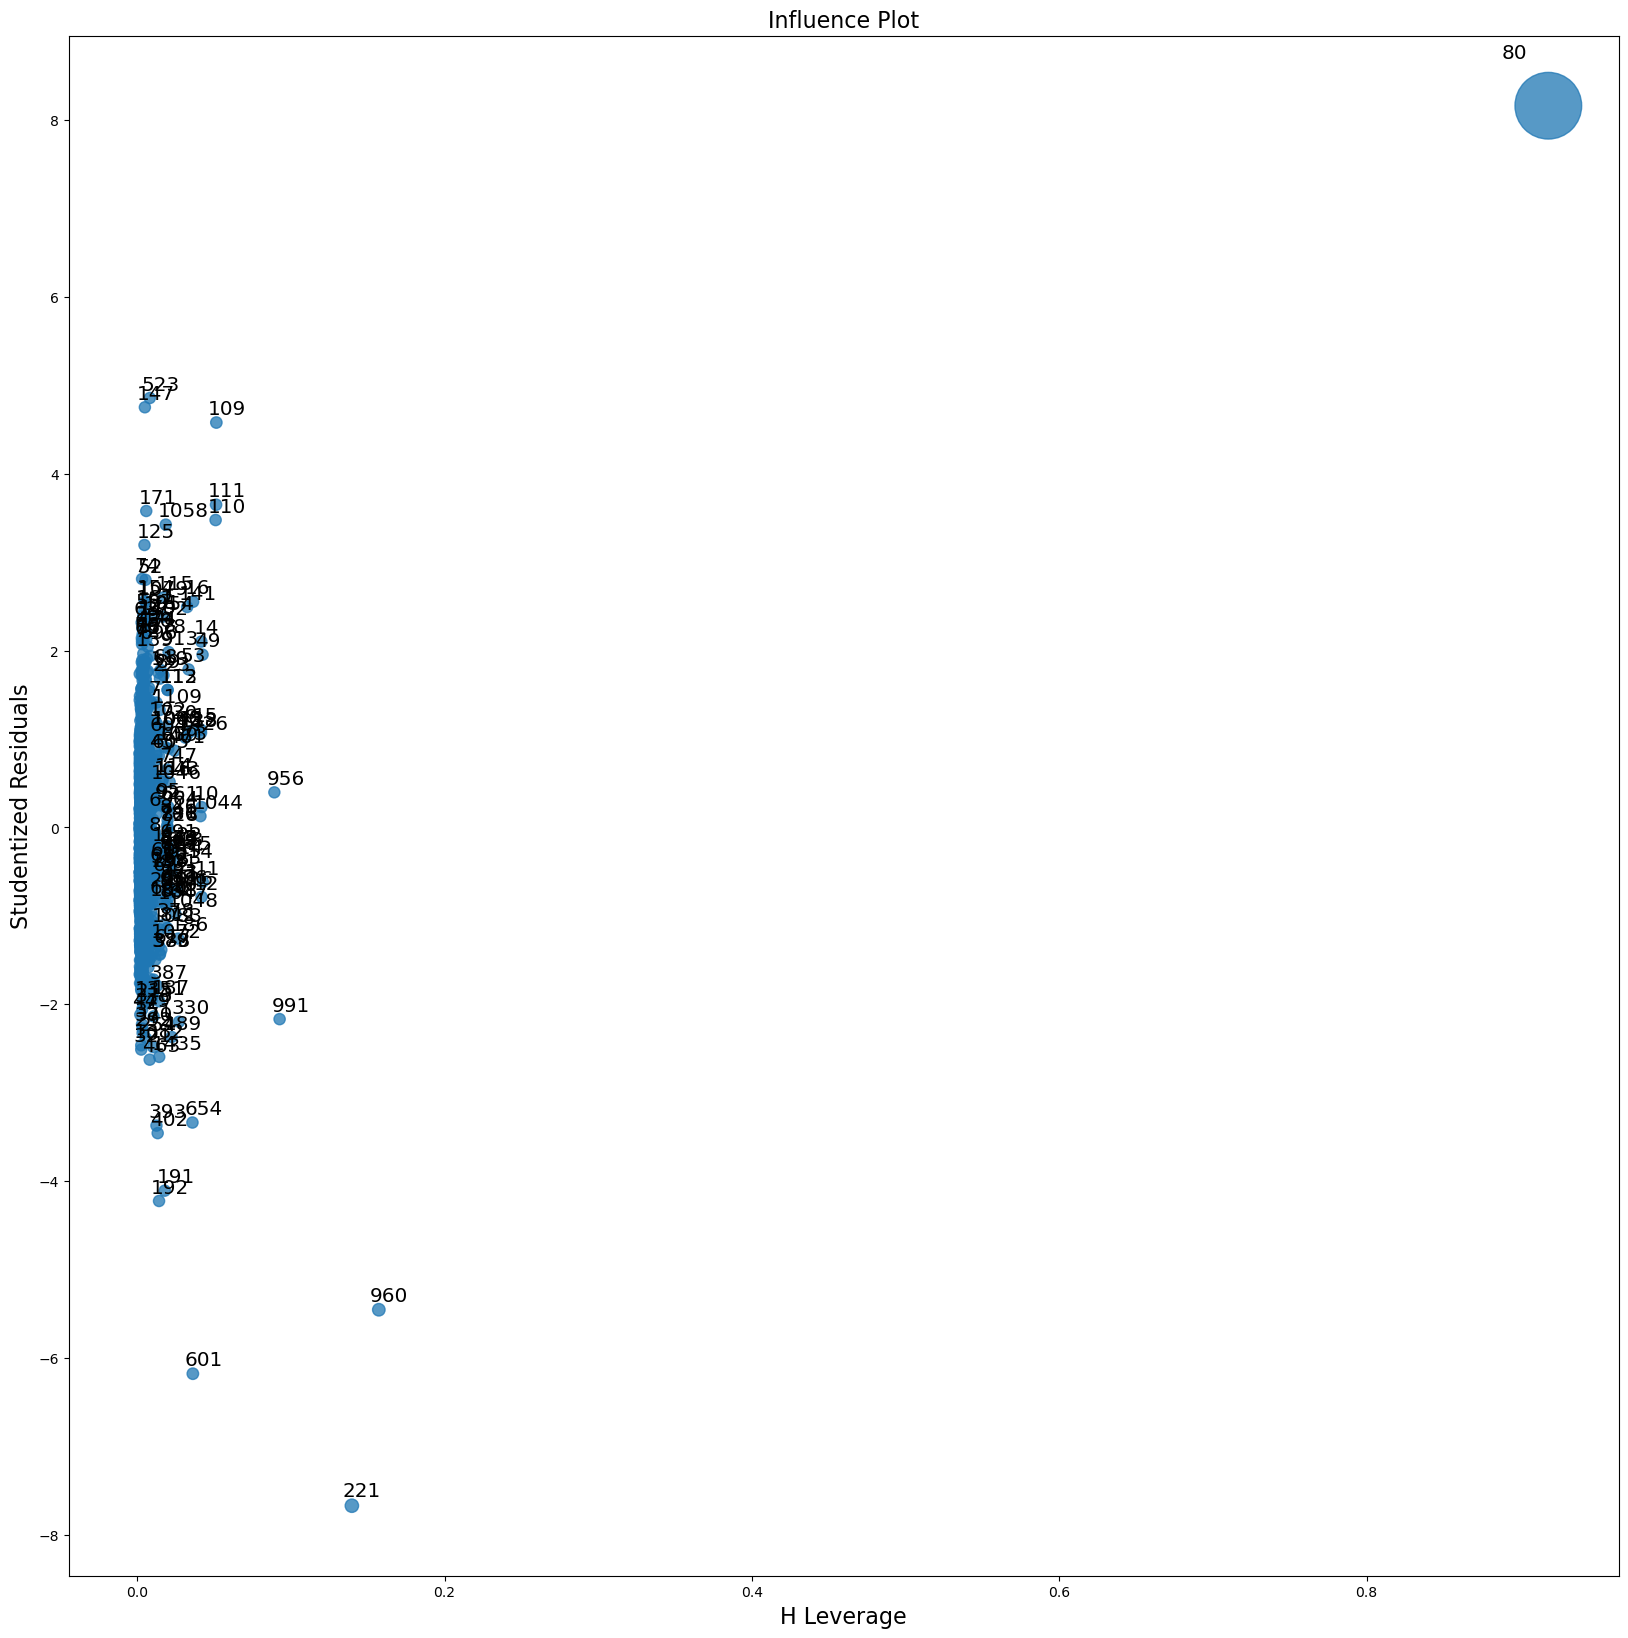

In [42]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [44]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020891364902506964

In [47]:
data[data.index.isin([109, 146, 522,220, 600, 959])] 

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
109  32500    4      1  116  2000      5      5  283    1480
146  20500   20  20000  110  1600      5      5  100    1165
220  11950   43  74285  110  1600      5      5   85    1075
522   9650   53  49969  110  1600      5      5   85    1075
600  11250   47   5309  110  1600      3      5   85    1070
959   8895   61  50925  110  1600      5      5   85    1070

# Improving the Model

In [48]:
# Creating a copy of data so that original dataset is not affected
tcars_new=data.copy()
tcars_new

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1431   7500   69  20544   86  1300      3      5   69    1025
1432  10845   72  19000   86  1300      3      5   69    1015
1433   8500   71  17016   86  1300      3      5   69    1015
1434   7250   70  16916   86  1300      3      5   69    1015
1435   6950   76      1  110  1600      5      5   19    1114

[1436 rows x 9 columns]

In [49]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
tcars=tcars_new.drop(tcars_new.index[[109, 146, 522,220, 600, 959]],axis=0).reset_index(drop=True)
tcars

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1425   7500   69  20544   86  1300      3      5   69    1025
1426  10845   72  19000   86  1300      3      5   69    1015
1427   8500   71  17016   86  1300      3      5   69    1015
1428   7250   70  16916   86  1300      3      5   69    1015
1429   6950   76      1  110  1600      5      5   19    1114

[1430 rows x 9 columns]

# Model - Re-build, Re-check and Re-improve

In [50]:
model1=smf.ols('Price~Age+KM+HP+Doors+Gears+Weight',data=tcars).fit()

In [51]:
# Get influencers using cook's distance
(c_1,_)=model1.get_influence().cooks_distance
c_1

array([4.80455201e-03, 2.75340494e-03, 3.43274132e-03, ...,
       3.60971137e-06, 8.42997888e-04, 1.20302335e-02])

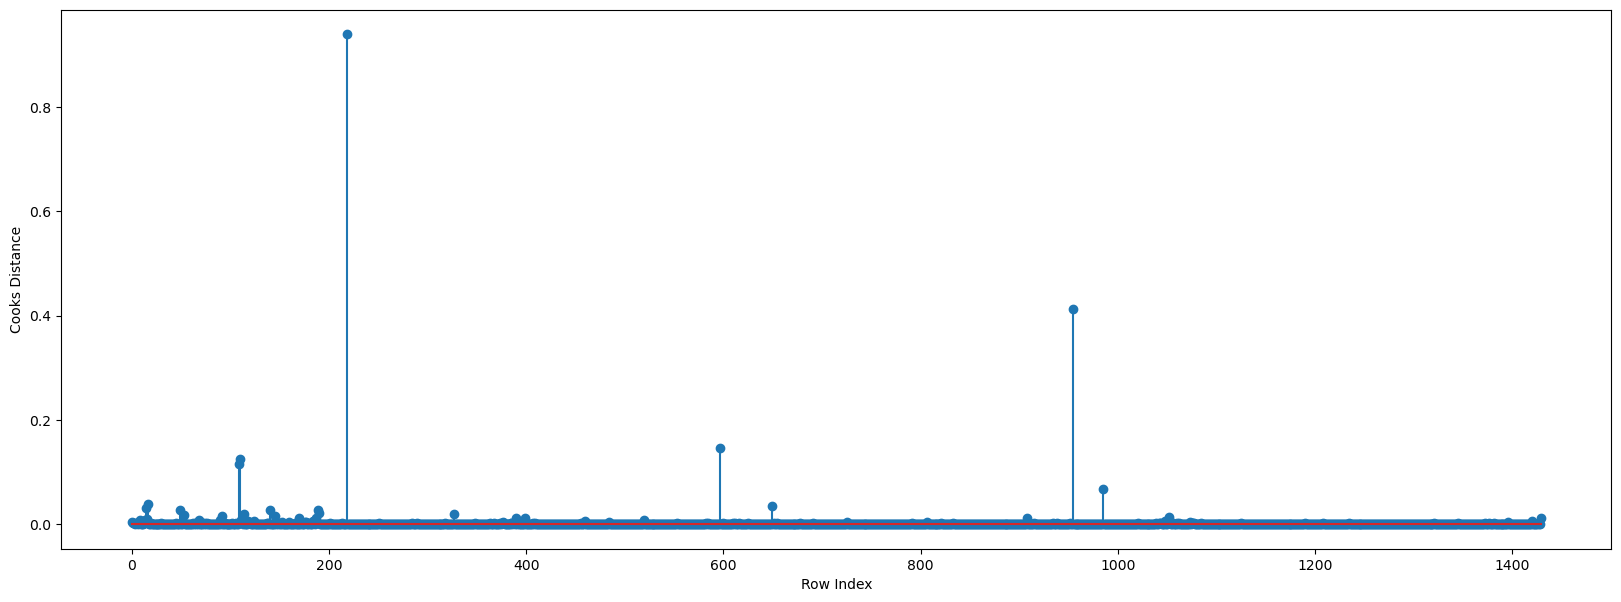

In [52]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(tcars)),np.round(c_1,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [53]:
# Index and value of influencer where C>0.5
np.argmax(c_1) , np.max(c_1)

(218, 0.9404322055149804)

# Final Model

In [54]:
final_model=smf.ols('Price~Age+KM+HP+Doors+Gears+Weight',data=tcars).fit()

In [55]:
final_model.rsquared , final_model.aic

(0.8615913788208506, 24645.924787642474)

# Model Predictions

In [56]:
#New data for prediction is
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"Doors":4,"Gears":5,"Weight":1012},index=[0])
new_data

Age     KM  HP  Doors  Gears  Weight
0   12  40000  80      4      5    1012

In [57]:
# Manual Prediction of Price
final_model.predict(new_data)

0    14984.350939
dtype: float64

In [58]:
# Automatic Prediction of Price with 87.66% accurcy
pred_y=final_model.predict(tcars)
pred_y

0       16499.230610
1       15988.704117
2       16480.190387
3       16110.841181
4       15895.252337
            ...     
1425     8770.200392
1426     8254.582790
1427     8416.427214
1428     8541.208252
1429    10576.135709
Length: 1430, dtype: float64